# Projet numérique de Mathématiques 2 - Equations Différentielles

## Introduction

Toute la théorie du cours au sujet de la résolution numérique d'équations différentielles est basée sur le pas de temps $\Delta t_j$. Cepedant se posent deux problèmes:
- savoir déterminer un pas fixe à l'avance
- affirmer que celui choisit est assez précis sans connaître la solution

On peut cependant essayer avec un pas fixe dans un premier temps.

## I. Pas fixe

### Schéma d'ordre 1 : Euler explicite

On écrit d'abord une fonction $solve\_euler\_explicit$ prenant en entrée une fonction $f$, une condition initiale $x_0$, un pas de temps $dt$, et les temps initiaux et finaux, et renvoyant le vecteur des temps $t_j$ et de la solution $x_j$ du schéma d’Euler explicite appliqué à $\dot{x} = f(t, x)$.

#### Modules

Voici les modules utilisés dans le script:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

#### $solve\_euler\_explicit$

In [10]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    '''Schéma d'euler explicite'''
    t_list = np.array([])
    t = t0
    while t <= tf: #On crée la liste des temps
        t_list = np.append(t_list,t)
        t = t + dt
    x_list = np.array([x0,])
    for j in range(1,len(t_list)): #On calcule terme à terme
        x_list = np.append(x_list, np.array([x_list[j-1] + dt*f(t_list[j-1],x_list[j-1]),]),axis=0)
    return t_list, x_list

#### Test sur une équation différentielle connue

Nous avons décidé de prendre l'équation différentielle $x'(t) + (t-1)*x(t) = 0$.

Cette équation différentielle est équivalente à $\dot{x} = f(t, x)$ avec f définie comme suit:

In [11]:
def f(t,x):
    return np.array([-(t-1)*x[0]])

Une solution de cette équation sur l'intervalle $[-2,3]$ est: $
\begin{array}{ccccc}
x & : & [-2,3] & \to & \mathbf{R} \\
 & & t & \mapsto & exp(-\frac{(t-1)^2}{2}) \\
\end{array}
$

On la code donc ainsi:

In [12]:
def x_vrai(t):
    return np.exp(-0.5*((t-1)**2))

Nous allons donc tracer la fonction x_vrai (vectorisée pour s'appliquer à un array numpy) et celle approchée par le schéma d'Euler:

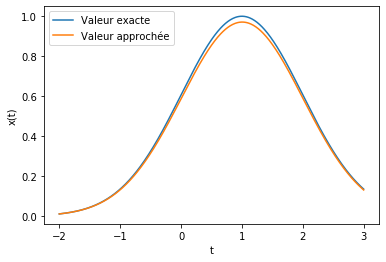

In [13]:
T,E = solve_euler_explicit(f,np.array([exp(-4.5)]),0.01,-2,3)
X = x_vrai(T)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(T, X,label='Valeur exacte')
plt.plot(T, E,label='Valeur approchée')
plt.legend()
plt.show()

Nous voulons donc montrer la convergence du schéma d'Euler explicite à l'ordre 1:

Pour cela, on calcule le maximum, parmi tous les points, de la norme entre le point calculé et la solution à un instant t sur une échelle logarithmique puis on compare avec une droite affine de pente 1 :

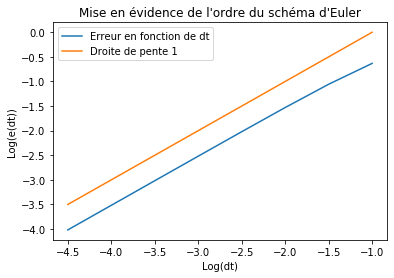

In [28]:
Max =[]
table = []
for j in range(2,10):
    Z = []
    T,X0 = solve_euler_explicit(f,np.array([exp(-4.5)]),10**(-j/2),-2,3)
    i=0
    for elem in X0:
        Z.append(abs(elem-x_vrai(T[i])))
        i=i+1
    Max.append(log10(max(Z)))
    table.append(-j/2)
    
a = [-4.5, -4, -3, -2, -1] #Pour le tracé de la pente connue
b=[-3.5, -3, -2, -1, 0]

plt.title('''Mise en évidence de l'ordre du schéma d'Euler''')
plt.xlabel('Log(dt)')
plt.ylabel('Log(e(dt))')
plt.plot(table,Max,label = 'Erreur en fonction de dt')
plt.plot(a,b,label = 'Droite de pente 1')
plt.legend()
plt.show()

### Schéma d'ordre 2: méthode de Heun

Comme précédemment, nous calculons les points de proche en proche avec la fonction $solve\_heun$

In [19]:
def solve_heun(f, x0, dt, t0, tf):
    '''Méthode de Heun'''
    t_list = np.array([])
    t = t0
    while t <= tf: #On recalcule les temps comme tout à l'heure
        t_list = np.append(t_list, t)
        t = t + dt
    x_list = np.array([x0,])
    for j in range(1,len(t_list)): #On calcule terme à terme avec la nouvelle formule de Heun
        x_list = np.append(x_list, np.array([x_list[j-1] + (dt/2)*(f(t_list[j-1],x_list[j-1])+f(t_list[j-1]+dt,x_list[j-1]+dt*f(t_list[j-1],x_list[j-1]))),]),axis=0)
    return t_list, x_list

Test sur la même équation que précédemment:

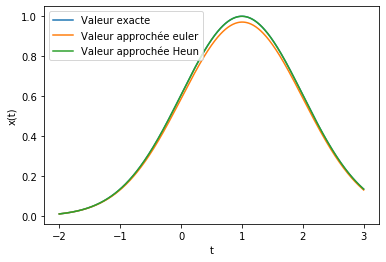

In [18]:
T,E = solve_euler_explicit(f,np.array([exp(-4.5)]),0.01,-2,3)
T,H = solve_heun(f,np.array([exp(-4.5)]), 0.01, -2, 3)
X = x_vrai(T)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(T, X, label='Valeur exacte')
plt.plot(T, E,label='Valeur approchée euler')
plt.plot(T, H,label='Valeur approchée Heun')
plt.legend()
plt.show()

Nous voulons enfin montrer la convergence de la méthode de Heun à l'ordre 2. Pour cela, on calcule le maximum, parmi tous les points, de la norme entre le point calculé et la solution à un instant t que l'on appelle l'erreur e. Puis nous comparons sur une échelle logarithmique avec une droite affine de pente 2 :

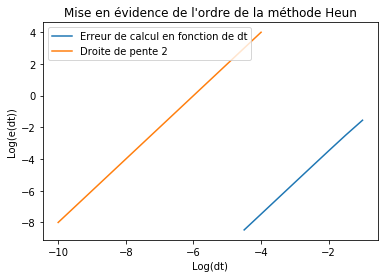

In [27]:
Max2 =[]
table = []
for j in range(2,10):
    Z = []
    T,X0 = solve_heun(f,np.array([exp(-4.5)]),10**(-j/2),-2,3)
    i=0
    for elem in X0:
        Z.append(abs(elem - x_vrai(T[i]))) #On calcule les normes des différences de points calculés et connus
        i=i+1
    Max2.append(log10(max(Z))) #On ajoute le max de la liste calculée des normes
    table.append(-j/2)

a = [-10,-8,-6,-4]
b=[-8,-4,0,4]

plt.title('''Mise en évidence de l'ordre de la méthode Heun''')
plt.xlabel('Log(dt)')
plt.ylabel('Log(e(dt))')
plt.plot(table,Max2,label ='Erreur de calcul en fonction de dt')
plt.plot(a,b, label='Droite de pente 2')
plt.legend()
plt.show() 

## II. Adaptation du pas de temps

Idée: adapter la valeur du pas $\delta t_j$ à chaque itération. On modifie le pas de temps en fonction de l'erreur trouvée par rapport à un seuil. Mais cela suppose d’avoir une idée de l’erreur commise.

### Estimation de l'erreur locale

Il s'agit de montrer que si f est $C^1$, on a dans le cas d'un schéma d’Euler explicite:

$||e^{j+1}|| = \delta t_j \frac{||f(t_{j+1}, x^{j+1})||}{2} + O(\Delta t_j ^3)$

#### Réponse

Pour cela, on écrit d'abord la définition de $e^{j+1}$:

$e^{j+1} = x^j + \displaystyle \int_{t_{j}}^{t_{j+1}} f(s, x(s))\mathrm{d}s - x^{j+1}$

On remplace $x^{j+1}$ par sa définition:

$e^{j+1} = \displaystyle \int_{t_{j}}^{t_{j+1}} f(s, x(s))\mathrm{d}s - \Delta t_j f(t_j, x^{j})$

$e^{j+1} = \displaystyle \int_{t_{j}}^{t_{j+1}} \dot{x}(s) \mathrm{d}s - \Delta t_j f(t_j, x^{j})$

$e^{j+1} = x(t_{j+1}) - x(t_j) - \Delta t_j f(t_j, x^{j})$

$e^{j+1} = \Delta t_j (\frac{x(t_{j+1}) - x(t_j)}{\Delta t_j} - f(t_j, x^{j}))$

En parallèle, on réalise un développement limité de $x$ en $t_j$ à l'ordre 2. Ceci est possible car $f$, donc $\dot x$, est $C^1$ donc $x$ est $C^2$:

$x(t_{j+1}) = x(t_j) + \Delta t_j \dot x(t_j) + \frac{\Delta t_j^2}{2} \ddot{x}(t_j) + O(\Delta t_j^3)$

$x(t_{j+1}) = x(t_j) + \Delta t_j f(t_j, x(t_j)) + \frac{\Delta t_j^2}{2} \ddot{x}(t_j) + O(\Delta t_j^3)$

$\frac{x(t_{j+1}) - x(t_j)}{\Delta t_j} = f(t_j, x(t_j)) + \frac{\Delta t_j}{2} \ddot{x}(t_j) + O(\Delta t_j^2)$

Ainsi,

$e^{j+1} = \Delta t_j (f(t_j, x(t_j)) - f(t_j, x^{j})) + \frac{\Delta t_j^2}{2} \ddot{x}(t_j) + O(\Delta t_j^3)$

Or, comme il est fait l'hypothèse (qui nous a été précisée lors du tutorat) que $x^j = x(t_j)$, il reste:


$e^{j+1} = \frac{\Delta t_j^2}{2} \ddot{x}(t_j) + O(\Delta t_j^3)$

De plus, on peut calculer également $\ddot x$:

$\ddot x(t_j) = \delta_t f(t_j, x(t_j) + \delta_x f(t_j, x(t_j))f(t_j, x(t_j))$

D'où, avec l'hypothèse précédente:

$\ddot x(t_j) = \delta_t f(t_j, x^j) + \delta_x f(t_j, x^j)f(t_j, x^j)$

Pour relier ceci à l'expression finale, on réalise un développement limité multivarié (ou deux développements limités qui se succèdent) sur $f(t_{j+1}, x^{j+1})$. Ceci est possible car encore une fois, f est $C^1$:

$f(t_{j+1}, x^{j+1}) = f(t_{j}, x^{j}) + \Delta t_j \delta_t f(t_j, x^{j}) + (x^{j+1} - x^j)\delta_x f(t_j, x^j) + O(||\Delta t_j, x^{j+1} - x^j||^2)$

Or d'après le schéma d'Euler, on a par définition:

$x^{j+1} - x^j = \Delta t_j f(t_j, x^j)$ 

D'où en remplaçant:

$f(t_{j+1}, x^{j+1}) = f(t_{j}, x^{j}) + \Delta t_j \ddot x(t_j) + O(||\Delta t_j, x^{j+1} - x^j||^2)$

En revenant à $e^{j+1}$, on obtient:

$e^{j+1} = \frac{\Delta t_j}{2} (f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j}) - O(||\Delta t_j, x^{j+1} - x^j||^2)) + O(\Delta t_j^3)$

Et donc $e^{j+1} = \frac{\Delta t_j}{2} (f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j})) + O(\Delta t_j^3) + O(\Delta t_j^3)$ par le même argument du schéma d'Euler

Et donc par les opérations sur les o et O, on obtient:

$e^{j+1} = \Delta t_j \frac{f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j})}{2}  + o(\Delta t_j^2)$

En passant à la norme, par inégalité triangulaire:

$||e^{j+1}|| = \Delta t_j \frac{||f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j})||}{2}  + o(\Delta t_j^2)$

### Proposition d'adaptation

On souhaite montrer que le nouveau pas de temps à choisir à chaque fois est déterminé ainsi:

$\Delta t_{new} = \Delta t \sqrt{\frac{Tol_{abs}}{||e^{j+1}||}}$

#### Preuve du O

Il est d'abord demandé de justifier que $e^{j+1} = O(\Delta t_j^2)$

Pour cela, on revient à l'expression montrée précédemment:

$||e^{j+1}|| = \Delta t_j \frac{||f(t_{j+1}, x^{j+1}) - f(t_{j}, x^{j})||}{2}  + o(\Delta t_j^2)$

On utilise ceci:

$\ddot x(t_j) = \delta_t f(t_j, x^j) + \delta_x f(t_j, x^j)f(t_j, x^j)$

Et ceci:

$e^{j+1} = \frac{\Delta t_j^2}{2} \ddot{x}(t_j) + O(\Delta t_j^3)$

Or, comme on travaille à $t_j$ fixé, on sait que $\ddot x(t_j)$ est fini. 
Ainsi on a par définition du O que $e^{j+1} = O(\Delta t_j ^2)$

#### Justification de la stratégie

D'après un théorème sur les $O$, on sait que $\frac{||e^{j+1}||}{\Delta t_j^2} \leq C$ avec $C$ une constante

Or nous souhaitons avoir $||e^{j+1}_{new}|| \leq Tol_{abs}$ comme cité dans le cours. En particulier, si on a $C\Delta t_{new}^2 \leq Tol_{abs}$ alors on a en particulier $||e^{j+1}_{new}|| \leq Tol_{abs}$

En utilisant la première inégalité, on obtient: $\frac{||e^{j+1}||}{\Delta t_j^2}\Delta t_{new}^2 \leq C \Delta t_{new}^2$

Et on veut $\frac{||e^{j+1}||}{\Delta t_j^2}\Delta t_{new}^2 \leq C \Delta t_{new}^2 \leq Tol_{abs}$. Ainsi, on peut bel et bien affirmer qu'en prenant $\Delta t_{new} = \Delta t_j \sqrt{\frac{Tol_{abs}}{||e^{j+1}||}}$, on valide les conditions d'erreur. Ceci permet d'augmenter le pas de temps si notre erreur est vraiment minime par rapport à nos exigences et inversement, si l'erreur est au dessus de $Tol_{abs}$, on a un plus petit pas de temps et on gagne donc en précision. Le but de l'algorithme est atteint

### Explication et illustration du solveur fourni

Nous rappelons le solveur fourni pour pouvoir l'étudier:

#### Modules utilisés

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *

#### Programme

In [23]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    variation = []
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t,x)
            x_back = x_next - dt * f(t_next,x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t,x)
        variation.append(t_next-ts[-1])
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return ts, xs, variation

Dans la boucle while : $t_i < dt_{max}$, la fonction va calculer les nouvelles valeur de $x$ puis en calculant la norme de l'erreur, il va ajuster la valeur de $dt$. En effet si l'erreur est faible alors le nouveau $dt$ sera grand et on dépassera $dt_{max}$ et donc on fixera une nouvelle valeur de $x$ tout en ayant $dt = \frac{dtmax}{2}$, ce qui revient à une augmentation de $dt$. Dans le cas inverse ou l'erreur est grande, alors cela diminuera $dt$ et on pourra être plus précis sur les valeurs de $x$ que l'on recalculera plusieurs fois. 

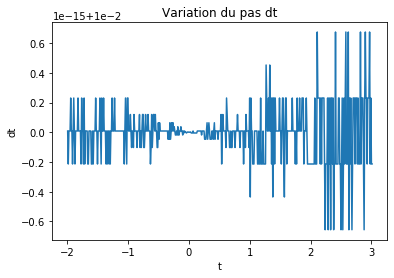

In [24]:
T,X3,variation = solve_ivp_euler_explicit_variable_step(f,-2,np.array([exp(-4.5)]),3)
plt.plot(T[1:],variation)
plt.xlabel('t')
plt.ylabel('dt')
plt.title('Variation du pas dt')
plt.show()

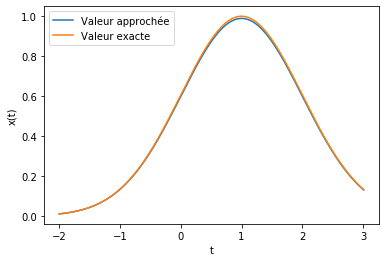

In [25]:
plt.plot(T,X3, label='Valeur approchée')
X=x_vrai(T)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(T,X, label='Valeur exacte')
plt.legend()
plt.show()